#**Load MNIST Image Data and Fit Model**

In [2]:
# SHAP can break with the latest version of tensorflow ...
import tensorflow as tf
import numpy as np

from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

model = tf.keras.models.Sequential([
  tf.keras.Input(name="x", shape=(28, 28, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10,activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8029 - loss: 0.6839 - val_accuracy: 0.9388 - val_loss: 0.2044
Epoch 2/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9378 - loss: 0.2149 - val_accuracy: 0.9577 - val_loss: 0.1442
Epoch 3/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9551 - loss: 0.1561 - val_accuracy: 0.9654 - val_loss: 0.1135
Epoch 4/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9645 - loss: 0.1236 - val_accuracy: 0.9678 - val_loss: 0.1034
Epoch 5/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9690 - loss: 0.1029 - val_accuracy: 0.9726 - val_loss: 0.0891
Epoch 6/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9735 - loss: 0.0892 - val_accuracy: 0.9731 - val_loss: 0.0838
Epoch 7/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9748 - loss: 0.0818 - val_accuracy: 0.9751 - val_loss: 0.0776
Epoch 8/12
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9788 - loss: 0.0704 - val_accuracy: 0.

#**Load SHAP and Explain Predictions**

In [4]:
!pip install shap
import shap
import numpy as np

# We will randomly sample 100 images from the training data.
# This image set will be used as the basis for constructing counter-examples (permutations/combinations) for each feature-value, which marginal contributions will be averaged over for each feature.
background = x_train[np.random.choice(x_train.shape[0], 100, replace=False)]
background = background.reshape(background.shape[0], 28, 28, 1) # Reshape to (100, 28, 28, 1)

# explain predictions of the model on two images
# Note that Deep Explainer is specific to Neural Nets, and works better at capturing them than
# GradientExplainer, which is more general and can be used with any ML model.
e = shap.DeepExplainer(model, background)

x_test_reshaped = x_test[0:2].reshape(2, 28, 28, 1) # Reshape to (2, 28, 28, 1)
shap_values = e.shap_values(x_test_reshaped)

/usr/local/lib/python3.11/dist-packages/shap/explainers/_deep/deep_tf.py:94: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: x
Received: inputs=['Tensor(shape=(100, 28, 28, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: x
Received: inputs=['Tensor(shape=(200, 28, 28, 1))']
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: x
Received: inputs=['Tensor(shape=(2, 28, 28, 1))']
  warnings.warn(msg)


Here, we produce plots of the SHAP values associated with pixels for five text images, for each of the different outcome class labels in the softmax.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
7
2


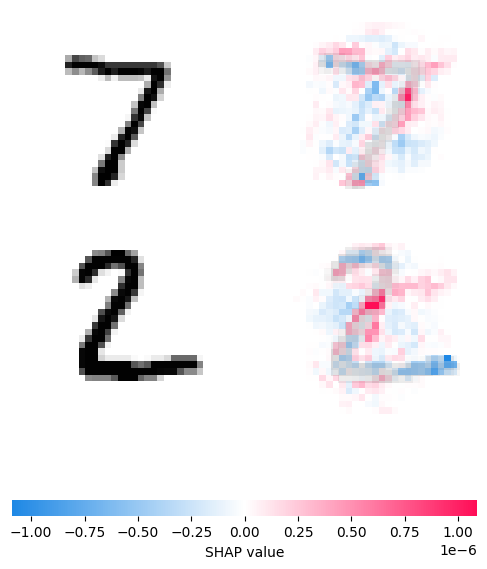

In [5]:
predictions = model.predict(x_test)
print(np.argmax(predictions[0]))
print(np.argmax(predictions[1]))

shap.image_plot(shap_values, -x_test[0:2])